In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [2]:
# Load & Read the file
df = pd.read_csv('sales_data.csv')
df.head()

,OrderID,OrderDate,Region,Salesperson,ProductName,Sales
0,1001,2023-01-01,East,Alice,Laptop,1200
1,1002,2023-01-16,West,Bob,Tablet,800
2,1003,2023-01-31,North,Charlie,Monitor,450
3,1004,2023-02-15,South,David,Printer,700
4,1005,2023-03-02,East,Eve,Laptop,1300


In [4]:
# Information about columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderID      10 non-null     int64 
 1   OrderDate    10 non-null     object
 2   Region       10 non-null     object
 3   Salesperson  10 non-null     object
 4   ProductName  10 non-null     object
 5   Sales        10 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


In [6]:
# It gives Stastical summary
df.describe()

,OrderID,Sales
count,10.00000,10.0000
mean,1005.50000,808.0000
std,3.02765,305.4614
min,1001.00000,450.0000
25%,1003.25000,542.5000
50%,1005.50000,775.0000
75%,1007.75000,1030.0000
max,1010.00000,1300.0000


In [13]:
# Group by ProductName and sum Sales
top_products = df.groupby("ProductName")["Sales"].sum().reset_index()

# Sort by Sales in descending order
top_products = top_products.sort_values(by="Sales", ascending=False)

print(top_products)

  ProductName  Sales
0      Laptop   3600
3      Tablet   1620
2     Printer   1450
1     Monitor   1410


In [8]:
Regional_sales = df.groupby("Region")["Sales"].sum().reset_index()

print(Regional_sales)

  Region  Sales
0   East   3600
1  North   1270
2  South   1450
3   West   1760


In [9]:
# Group by Region and Month
Regional_Monthly_Sales = df.groupby(["Region", "Month"])["Sales"].sum().reset_index()
print(Regional_Monthly_Sales)

  Region    Month  Sales
0   East  2023-01   1200
1   East  2023-03   1300
2   East  2023-05   1100
3  North  2023-01    450
4  North  2023-04    820
5  South  2023-02    700
6  South  2023-04    750
7   West  2023-01    800
8   West  2023-03    470
9   West  2023-05    490


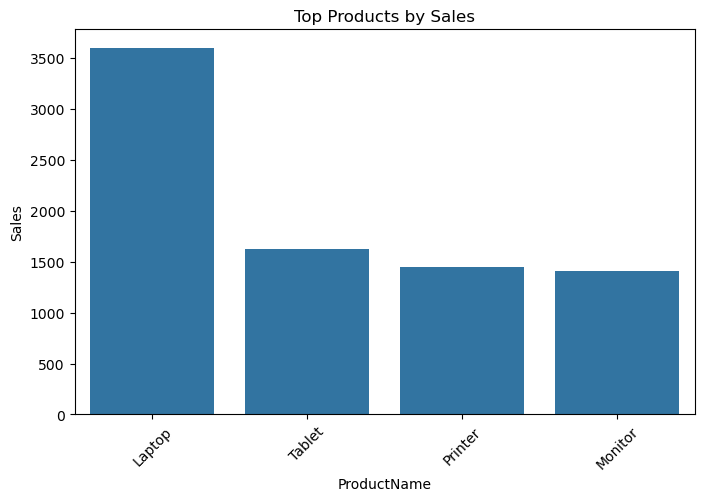

In [14]:
# Bar plot for Top Products
plt.figure(figsize=(8,5))
sns.barplot(x="ProductName", y="Sales", data=top_products)
plt.title("Top Products by Sales")
plt.xticks(rotation=45)
plt.show()

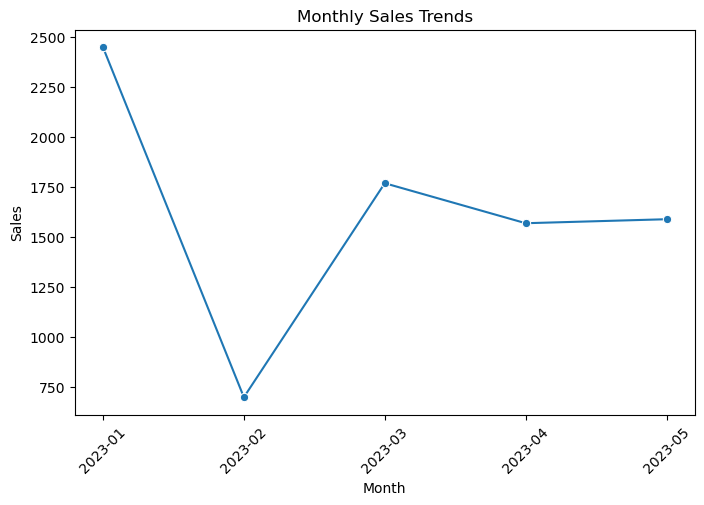

In [15]:
# Line plot for Monthly Sales Trends
plt.figure(figsize=(8,5))
sns.lineplot(x="Month", y="Sales", data=monthly_trends, marker="o")
plt.title("Monthly Sales Trends")
plt.xticks(rotation=45)
plt.show()

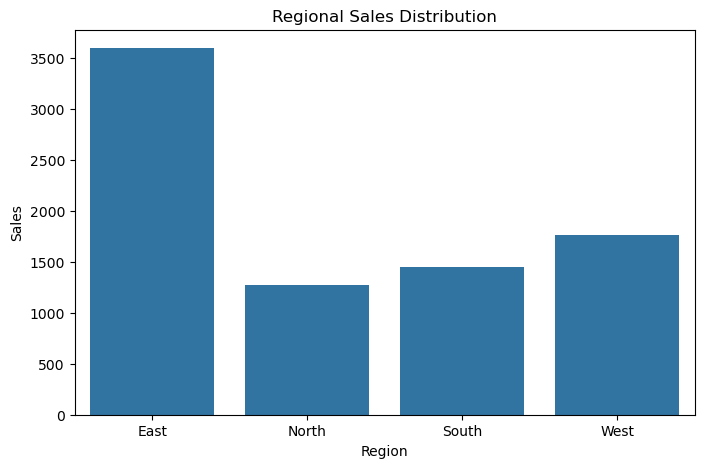

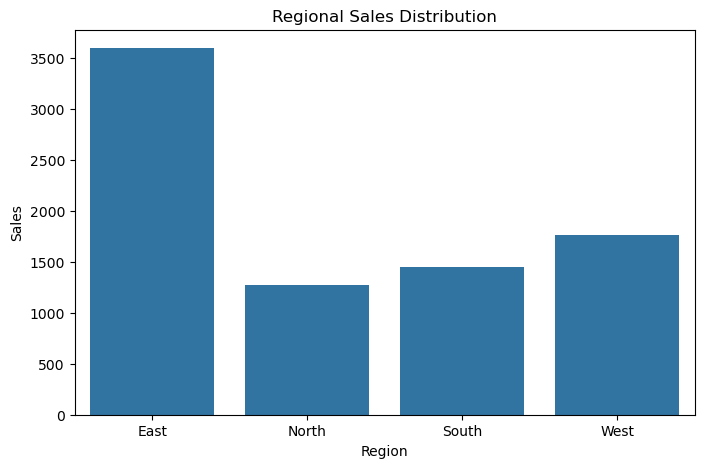

In [16]:
# Bar chart for Regional Sales
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=Regional_sales)
plt.title("Regional Sales Distribution")
plt.show()